# NumPy
---
Notebook by Alice Hsu (Mar 2025)

Concepts covered:
* Creating arrays
* Indexing, slicing, and changing data
* Creating data masks
* Methods for creating arrays
* Methods for analyzing arrays
* Practical with pollutant concentrations
---

# ![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/NumPy_logo_2020.svg/320px-NumPy_logo_2020.svg.png) 

NumPy is a Python package used for handling large amounts of numerical data. It is very commonly used for working with multi-dimensional data (e.g., 2D, 3D, and even 4D and up!), such as geospatial datasets. NumPy is typically imported using the np alias:

                                    import numpy as np

For example, a geospatial dataset might contain data for each <span style="color:blue">latitude</span>, <span style="color:red">longitude</span>, and <span style="color:darkorange">time step</span> - this would give you a 3D dataset, where the <span style="color:blue">rows</span> represent the <span style="color:blue">latitudes</span>, <span style="color:red">columns</span> represent the <span style="color:red">longitudes</span>, and the <span style="color:darkorange">layers</span> represent the <span style="color:darkornage">time steps</span>.

<img src="figures/data_cube.png" style="height:90%; width:50%;">

In [3]:
import numpy as np # Because python users are too lazy to write numpy every time...
                   # ...but also because it's more readable and succinct
import matplotlib.pyplot as plt

### Lists vs NumPy Arrays
Lists and NumPy arrays seem similar at first, but they function very differently.

* **Lists** can hold **different data types** at a time. However, **computations must be done on each individual element**.
    * If a list has 100 elements, to perform an operation on everything in the list, **you have to do 100 computations**.
* **NumPy arrays** can only hold one data type at a time. However, **computations are <u>vectorized</u>**:
    * You can perform a mathematical operation on every element at once.
    * If a NumPy array has 100 elements, to perform an operation on everything in the array, **you have to do only 1 computation**.
        * Arrays are (generally) faster than lists.
    * Many packages use NumPy arrays to store data.

In [4]:
list_a = [1, 2, 3, 4]
a1d = np.array(list_a)
a1d

array([1, 2, 3, 4])

In [5]:
a2d = np.array([[10.,20,30,40], [9,8,5,3], [1,2,3,4]])
a2d

array([[10., 20., 30., 40.],
       [ 9.,  8.,  5.,  3.],
       [ 1.,  2.,  3.,  4.]])

Use the built-in `type()` function to check the datatype of `a1d`.

In [ ]:
#### YOUR CODE HERE ####


Check the shape of `a2d` using the `.shape` property.

In [ ]:
#### YOUR CODE HERE ####


The first element of a2d can be accessed using the code: `a2d[0,0]`. Check the data type of this value using the `type()` function.

In [ ]:
#### YOUR CODE HERE ####


### Mathematical Operations on NumPy Arrays

We can perform most basic mathematical functions on whole NumPy Arrays.

**Perform the following operations on the NumPy array `a1d`** using the syntax written in the worksheet:
* Multiply by 2 (`*`)
* Divide by 2 (`/`)
* Exponentiate by 2 (`**`)
* Add 2 (`+`)

In [ ]:
#### YOUR CODE HERE ####
a1d

In [ ]:
#### YOUR CODE HERE ####
a1d

In [ ]:
#### YOUR CODE HERE ####
a1d

In [ ]:
#### YOUR CODE HERE ####
a1d

You can also use **boolean operators** on NumPy arrays, such as:
* Greater than (`>`), Greater than or equal to (`>=`)
* Less than (`<`), Less than or equal to (`<=`)
* Equal to (`==`)
* Not equal to (`!=`)

This concept will become useful later on when we **mask and filter** data.

In [104]:
a1d>2

array([False, False,  True,  True])

In [105]:
a1d==3

array([False, False,  True, False])

In [107]:
a1d!=1

array([False,  True,  True,  True])

Multiply `list_a` by 2. How does the output differ from the output of `a1d*2`?

In [7]:
#### YOUR CODE HERE ####
list_a

You can perform **element-wise operations** on different NumPy arrays (or subsets of NumPy arrays), such as adding, subtracting, or multiplying together two arrays, **provided they are the same shape**.

You can check the shape of a NumPy array using the .shape

For example:

In [19]:
b1d = np.array([2,4,8,12])

print(a1d+b1d)
print(a1d*b1d)
print(a1d**b1d)

But we couldn't do:

In [ ]:
a1d*a2d

## Indexing and Slicing NumPy Arrays

### Indexing

#### 1D Arrays

Slicing works much like lists, in that **indexing starts at 0**, and you can also **access things from the end via a negative index**:

| Index |0|1|2|3|
|:-------|-------|----|-------|---------|
|`a1d`|`1`|`2`|`3`|`4`|
|**Negative Index**|**-4**|**-3**|**-2**|**-1**|

Thus, to access the last value in `a1d`, you could type `a1d[3]` or `a1d[-1]`, which would return `4`.

**Some Quick Indexing Exercises in 1D**:

**Access the `2` from `a1d` using both its positive and negative index.**

In [ ]:
#### YOUR CODE HERE ####
a1d[]

In [ ]:
#### YOUR CODE HERE ####
a1d[]

#### 2D Arrays
However, to access a value in a 2D array, you must specify **the row _and_ the column** your value is in.

For example, let's access some values in `a2d`:

||**0**|**1**|**2**|**3**|
|-|:-------:|:-------:|:----:|:-------:|
|**0**|`10.`|`20.`|`30.`|`40.`|
|**1**|`9.`|`8.`|`5.`|`3.`|
|**2**|`1.`|`2.`|`3.`|`4.`|

To access the value `30`, in the first row and third column, you would type: `a2d[0,2]`.

**Some Quick Indexing Exercises in 2D**:

**How would you access the value `5` in `a2d`?**

In [ ]:
#### YOUR CODE HERE ####
a2d[]

**Come up with two different ways to access the value `40` in `a2d`.**

In [ ]:
#### YOUR CODE HERE ####
a2d[]

In [ ]:
#### YOUR CODE HERE ####
a2d[]

### Boolean Indexing/Masks

Another way to extract data you want out of a NumPy array is to use a **boolean mask**.

A **boolean mask** is just an array of `True` and `False`, where the locations of the `True` correspond to the data you want to extract, and the `False` correspond to the locations of the data you want to mask out.

Recall the boolean operators:

|Greater than|Greater than</br>or equal to|Less than|Less than</br>or equal to|Equal to|Not equal to|
|:-:|:-:|:-:|:-:|:-:|:-:|
|`>`|`>=`|`<`|`<=`|`==`|`!=`|

You can also compound multiple boolean operators using `and` and `or`:

|`and`|`or`|
|:-:|:-:|
|&|$|$|

A simple example:

Consider an array, `x`.

In [13]:
x = np.array([1,3,-3,2,8,4])

Suppose we wanted to extract all values **less than 3**. The boolean mask would then be:

In [17]:
x<3

array([ True, False,  True,  True, False, False])

Notice how the **boolean mask has the same shape as the data we are masking**.

**Applying the mask** would then **return all the True values**, or all the values of x that are less than 3:

In [114]:
x[x<3]

array([ 1, -3,  2])

Use a boolean mask to extract all the values in `a2d` **greater than 0 and less than 4.**

In [ ]:
#### YOUR CODE HERE ####


### Slicing

You can also access parts, or slices, of your dataset by using the colon to specify the range you want. The colon is essentially the equivalent of saying “everything to and from” the row or column number you specify.

Consider `a2d`:

||**0**|**1**|**2**|**3**|
|-|:-------:|:-------:|:----:|:-------:|
|**0**|`10.`|`20.`|`30.`|`40.`|
|**1**|`9.`|`8.`|`5.`|`3.`|
|**2**|`1.`|`2.`|`3.`|`4.`|

Here, `a2D[0,1:3]` would extract the values in the 0th row, in the second (index 1) and third (index 2) columns, returning `[20,30]`.

Note that when you use the colon to specify a range, this range is not inclusive of the number specified on the right side - i.e., the `1:3` does not include the value with the index of 3.

**How would you access the slice containing [`20`,`30`,`40`]?**

In [9]:
#### YOUR CODE HERE ####


**How would you access the slice containing:**

|||
|-|-|
|**`5`**|**`2`**|
|**`3`**|**`4`**|

In [11]:
#### YOUR CODE HERE ####


**Consider a 3D array, `a3d`:**


In [24]:
a3d = np.array([a2d,a2d*2,a2d*4])
a3d

array([[[ 10.,  20.,  30.,  40.],
        [  9.,   8.,   5.,   3.],
        [  1.,   2.,   3.,   4.]],

       [[ 20.,  40.,  60.,  80.],
        [ 18.,  16.,  10.,   6.],
        [  2.,   4.,   6.,   8.]],

       [[ 40.,  80., 120., 160.],
        [ 36.,  32.,  20.,  12.],
        [  4.,   8.,  12.,  16.]]])

**How would you access the entire last layer:**

|||||
|-|-|-|-|
|`40`|`80`|`120`|`160`|
|`36`|`32`|`20`|`12`|
|`4`|`8`|`12`|`16`|


In [ ]:
#### YOUR CODE HERE ####


### Changing Values in Arrays

To replace a value in an array, simply **index the value or values** you wish to replace and **set it equal to the value or values to replace it with**.

For example, consider the array `b2d`:

In [27]:
b2d = a2d*2
b2d

array([[20., 40., 60., 80.],
       [18., 16., 10.,  6.],
       [ 2.,  4.,  6.,  8.]])

If you wanted to replace the number `4` with, say, `0`, we could write:

In [31]:
b2d[2,1] = 0
b2d

array([[20.,  4.,  6.,  8.],
       [18., 16., 10.,  6.],
       [ 2.,  0.,  6.,  8.]])

Say you wish to replace the slice `[40, 60, 80]` with `[4, 6, 8]`. The code to do this would be:

In [30]:
b2d[0,1:] = [4,6,8]
b2d

array([[20.,  4.,  6.,  8.],
       [18., 16., 10.,  6.],
       [ 2.,  4.,  6.,  8.]])

You can also replace multiple values with the same number:

In [33]:
b2d[0,1:] = 0
b2d

array([[20.,  0.,  0.,  0.],
       [18., 16., 10.,  6.],
       [ 2.,  0.,  6.,  8.]])

However, note that this line of code will give an error...why?

In [35]:
b2d[0,1:] = [1,2]

### <span style="color:blue"><u>**Exercise 1**</u></span>:
Consider a 3x7 array containing temperature readings for 3 different times across the 7 days of the week.

||**S**|**M**|**T**|**W**|**Th**|**F**|**S**|
|-|-|-|-|-|-|-|-|
|**9:00**|31|37|35|34|31|29|32|
|**12:00**|43|46|47|45|39|39|42|
|**15:00**|40|42|31|44|33|38|37|

In [20]:
T = np.array([[31, 37, 35, 34, 31, 29, 32],
              [44, 46, 47, 45, 39, 39, 42],
              [40, 42, 31, 44, 33, 38, 37]])

Data was incorrectly recorded for **Tuesday at 15:00**. How would you **change this entry from 31 to 41**?

In [ ]:
#### YOUR CODE HERE ####


You would like to **extract all the values from Monday to Friday**. What code would you write to do this?

In [ ]:
#### YOUR CODE HERE ####


**All the data taken at 9:00 needs to be corrected** for a calibration error that made the reading **20% lower than the actual temperature**. How would you **replace the old data with the corrected data**?

In [ ]:
#### YOUR CODE HERE ####


You want to **extract all the data above 40 degrees**. What code would you write to do that?

In [ ]:
#### YOUR CODE HERE ####


## Methods and Properties of NumPy Arrays

NumPy arrays have a range of useful properties and methods that make basic analysis very easy.  The syntax for using a method or property is your variable + a period + the method or property, with any relevant inputs to the method in parentheses. Note that properties do not have any inputs, so you don’t need the parentheses to call them. In the table below, the following methods are being performed on an array called `my_array`.

|Method/Property|Description|
|--|:--|
|`my_array.shape`|Get the shape (i.e., the dimensions; # of rows, columns, layers, etc.) of the array|
|`my_array.min()`, `my_array.max()`|Find the minimum or maximum value in the array. You can specify the axis you want to take the minimum or maximum across. For example, my_array.min(axis=0) will find the minimum or maximum value across all the rows (i.e., one for each column).|
|`my_array.argmin()`, `my_array.argmax()`|Find the index of the minimum or maximum value in the array. You can specify the axis for which you want to find the minimum or maximum’s index. For example, `my_array.argmin(axis=0)` will find the index of the minimum value across all the rows in your array (i.e., one for each column).|
|`my_array.sum()`|Calculate the sum of all the values in your array. You can specify the axis for which you want to compute the sum. For example, `my_array.sum(axis=0)` will sum up the values across all the rows in your array (i.e., one for each column).|
|`my_array.mean()`, `my_array.std()`|Calculate the mean or standard deviation of all the values in your array. You can specify the axis for which you want to compute the mean or standard deviation. For example, `my_array.mean(axis=0)` will compute the mean of all the values across all the rows in your array (i.e., one for each column).|

### Methods and Properties Examples

For the examples below, recall the array we made above, `a2d`:

In [29]:
a2d

array([[10., 20., 30., 40.],
       [ 9.,  8.,  5.,  3.],
       [ 1.,  2.,  3.,  4.]])

Before you run the cells below, see if you can predict the output based on the method description in the table above.

In [39]:
a2d.shape

In [30]:
a2d.max()

In [ ]:
a2d.argmax()

In [ ]:
a2d.sum()

In [ ]:
a2d.mean()

Note that for all of the above methods, you can **specify which `axis` you want to perform the operation on**.

For example, let's look at the `mean()` method.

If you do not specify an axis, it will automatically calculate the mean of all the values in the array: 

In [28]:
a2d.mean()

However, if you specify **`axis=0`**, then it will calculate the **mean across all the rows**.

In [ ]:
a2d.mean(axis=0)

If you specify **`axis=1`**, then it will calculate the **mean across all the columns**.

In [ ]:
a2d.mean(axis=1)

### <span style="color:blue">Exercise 2</span>:

Consider the same 3x7 array containing temperature readings for 3 different times across the 7 days of the week.

||**S**|**M**|**T**|**W**|**Th**|**F**|**S**|
|-|-|-|-|-|-|-|-|
|**9:00**|31|37|35|34|31|29|32|
|**12:00**|43|46|47|45|39|39|42|
|**15:00**|40|42|31|44|33|38|37|

What code would you write to calculate the **daily mean temperature** for **every day of the week?**

In [ ]:
#### YOUR CODE HERE ####


What code would you write to calculate the **mean temperature** for **every hour of the day across the whole week?**

Suppose you want to know the **time of day** that the **minimum temperature occurred** for **every day of the week**. What code would you write to get this information?

In [44]:
#### YOUR CODE HERE ####


### Other Useful NumPy Fuctions
There are hundreds of NumPy functions you can use to create or modify arrays, or analyze the data contained within them. You can find them as you need them in the official NumPy documentation. Here are a few commonly used ones to get you started:

<center><b><u>Functions for Creating Arrays</center></u></b>
    
|Method/Property|Parameters|Description|
|--|:--|:-|
|`np.linspace(x1,x2,N)`|**x1, x2**: start and end points<br>**n**: number of points you want between your start and end points; if you don’t specify N, it defaults to 50.|Get the shape (i.e., the dimensions; # of rows, columns, layers, etc.) of the array|Creates a 1D array containing N evenly spaced numbers between x1 and x2. When you want to specify the number of points between your domain limits.|
|`np.arange(x1,x2,dx)`|**x1, x2**: start and end points<br>**dx**: the spacing you want between the start and end points; if you don’t specify dx, it defaults to 1.|Find the minimum or maximum value in the array. You can specify the axis you want to take the minimum or maximum across. For example, my_array.min(axis=0) will find the minimum or maximum value across all the rows (i.e., one for each column).|Creates a 1D array containing numbers between x1 and x2 in intervals of dx. When you want to specify the size of the interval between your domain limits.|
|`np.zeros(n,m)`<br>`np.ones(n,m)`<br>`np.full((n,m),fill_val)`|**n**: number of rows<br>**m**: number of columns <br>**fill_val**: what to fill your array with|Find the index of the minimum or maximum value in the array. You can specify the axis for which you want to find the minimum or maximum’s index. For example, `my_array.argmin(axis=0)` will find the index of the minimum value across all the rows in your array (i.e., one for each column).|Creates an array with the dimensions n x m filled with zeros, ones, or a chosen fill value.|
|`np.random.randint(x1,x2,N)`|**x1, x2**: start and end points<br>**N**: number of points you want between your start and end points; if you don’t specify N, it defaults to 1.|Creates an array of N random integers between x1 and x2. You alternatively also create 2D or higher arrays by specifying a size using the size keyword argument.|

<center><b><u>Functions for Modifying the Shape of your Array</center></u></b>

|Method/Property|Description|
|--|:--|
`my_array.ravel()`|Flattens array - i.e., turns the array into a 1D array. For example, a 2x3 array would become a 1x6.
`my_array.reshape(n,m)`|Changes the shape of array into n x m, assuming that the number of data points within array is compatible with (“broadcastable to”) the new shape. The number of datapoints must be divisible by both n and m. For example, a 1D array with 20 values can be reshaped into a 4x5, a 5x4, a 2x10, a 10x2, but not a 3x7.

### Creating and Reshaping Arrays Examples

**Run the following cells** and see what outputs they produce. You can use the `.shape` property to check the shape of the outputs.

In [ ]:
np.linspace(1,100,51)

In [ ]:
np.arange(1,100,5)

In [47]:
np.zeros((9,11))

In [ ]:
np.full((3,4),99)

### <span style="color:blue">Exercise 3</span>


Create a NumPy array called `t` representing a time domain from t = 0 to t = 30 days, with 2 day intervals.

In [ ]:
#### YOUR CODE HERE ####
t = 

You have a dataset stored in a NumPy array called `temp123` containing 210 temperature measurements taken across 210 days. You want to **compute the weekly mean** of these temperature measurements - i.e., the **mean temperature for every 7 days of data**. What code could you write to do this?

_Hint: you can use the .reshape() and .mean() methods._

`temp123` is provided below. 

In [21]:
temp123 = np.random.randint(20,40,210)
temp123

array([38, 28, 24, 37, 20, 36, 20, 24, 32, 34, 33, 22, 30, 34, 23, 23, 33,
       20, 25, 38, 26, 36, 36, 32, 35, 32, 25, 26, 35, 30, 20, 34, 24, 28,
       39, 34, 21, 21, 32, 38, 35, 28, 35, 24, 39, 36, 31, 26, 38, 38, 26,
       22, 20, 39, 32, 34, 22, 33, 25, 34, 37, 21, 28, 38, 26, 35, 26, 25,
       31, 20, 34, 26, 24, 38, 21, 31, 22, 24, 39, 35, 33, 32, 20, 21, 32,
       28, 36, 34, 23, 39, 30, 31, 22, 27, 36, 33, 29, 39, 35, 25, 39, 26,
       29, 26, 26, 20, 38, 37, 23, 22, 20, 22, 23, 32, 23, 33, 32, 36, 33,
       31, 33, 33, 26, 27, 22, 34, 35, 36, 26, 34, 24, 33, 25, 25, 27, 23,
       33, 29, 37, 26, 34, 31, 38, 39, 22, 36, 31, 29, 22, 37, 33, 29, 37,
       23, 34, 32, 21, 23, 33, 38, 22, 32, 27, 34, 21, 24, 39, 20, 23, 23,
       35, 21, 37, 26, 21, 22, 25, 21, 24, 24, 23, 24, 30, 34, 25, 27, 20,
       36, 37, 21, 24, 26, 34, 33, 23, 26, 23, 24, 22, 29, 34, 37, 20, 34,
       33, 36, 32, 24, 37, 36])

In [ ]:
### YOUR CODE HERE ####
temp123.reshape()

# Practical: Pollutant Concentrations in a Lake

Consider a 3x8 array `C0` containing surface measurements of an initial pollutant concentration data (in μM) for a lake at t = 0, and `x` and `y` are point along the lake where measurements were taken.

||1km|2km|3km|4km|5km|6km|7km|
|-|-|-|-|-|-|-|-|
|**2km**|7|7|6|5.5|4|3|
|**4km**|9|8.5|8|8|7.5|6|5|
|**6km**|6|6|5.5|5|5|4|2|


In [48]:
C0 = np.array([[7,7,6,5.5,5,4,3],
                [9,8.5,8,8,7.5,6,5],
                [6,6,5.5,5,5,4,2]])

x = np.arange(1,8)
y = np.array([2,4,6])

Suppose the contaminant decays according to a first order reaction such that the concentration at a given time is given by the equation:

<center>$C(t) = C_0*e^{-k*t}$</center>

where _k_ is a rate constant equal to 0.01 $day^{-1}$, $C_0$ is the initial concentration such that $C(0) = $`C0`, represented at each point in the lake by the array C0 above, and t is the time that has passed, in days.

**1. Calculate the following arrays:**
* `C7`, a 3x8 array representing the contaminant concentration when t = 7 days
* `C14`, a 3x8 array representing the contaminant concentration when t = 14 days
* `C21`, a 3x8 array representing the contaminant concentration when t = 21 days
* `C28`, a 3x8 array representing the contaminant concentration when t = 28 days

In [ ]:
#### YOUR CODE HERE ####
C7 =
C14 = 
C21 = 
C28 = 

**2. Create a 3D NumPy array called Ct containing `C0`, `C7`, `C14`, `C21`, and `C28`, in that order.**
* Place the above variables into a list and then convert the list into a NumPy array.
* What is the shape of Ct? What do each of its dimensions represent?

You can **plot `Ct` below** to see if it is behaving as you would expect - **the concentration should decrease with time**.

In [81]:
#### YOUR CODE HERE ####


Check the shape of `Ct` here:

In [ ]:
#### YOUR CODE HERE ####


**3. You want to know what the <u>average pollutant concentration of the lake over the whole time period</u>, from 0 to 28 days.**

Calculate this using `Ct` and the `np.mean()` function and save this to a variable called `C_avg`.

_Hint: Think about what shape `C_avg` should have if it must represent the concentration over the entire lake._

In [91]:
#### YOUR CODE HERE ####
C_avg = 

**4.** Suppose you want to know the **average pollutant concentrations at x = 3 km**, even though we don't have a data point for this stretch of the lake.

However, we can interpolate these concentrations by averaging the concentrations at x = 2 km and x = 4 km. This is the equivalent of taking the concentrations $c_{2,1-7}$ and $c_{4,1-7}$ and averaging them.

||1km|2km|3km|4km|5km|6km|7km|
|-|-|-|-|-|-|-|-|
|**2km**|$c_{2,1}$|$c_{2,2}$|$c_{2,3}$|$c_{2,4}$|$c_{2,5}$|$c_{2,6}$|$c_{2,7}$|
|**4km**|$c_{4,1}$|$c_{4,2}$|$c_{4,3}$|$c_{4,4}$|$c_{4,5}$|$c_{4,6}$|$c_{4,7}$|
|**6km**|$c_{6,1}$|$c_{6,2}$|$c_{6,3}$|$c_{6,4}$|$c_{6,5}$|$c_{6,6}$|$c_{6,7}$|

Using `C_avg`, write some code that returns the pollutant concentrations at x = 3 km. The steps should help break it down for you:
1. From `C_avg`, extract the row of data at 2 km.
    1. Think about the **index** that corresponds to the data at x = 2 km.
2. From `C_avg`, extract the row of data at 4 km.
    1. Think about the **index** that corresponds to the data at x = 4 km. 
3. Average the two rows of data.

In [ ]:
C_avg[]

**4.** You want to know **which points** in the lake have a **concentration above 4 μM at each time step in `Ct`**.
* Your result should have 5 3x8 arrays that are `True` where the concentration is >4 μM and `False` otherwise.

In [1]:
#### YOUR CODE HERE ####


You can plot your different concentration arrays here (`C0`, `C7`, `C21`, etc) to check if they are behaving as expected.

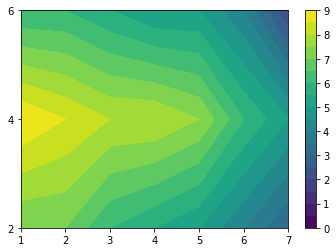

In [145]:
def plot_C(C):
    if C.ndim < 3:
        C = [C]
    for c in C:
        meshx,meshy = np.meshgrid(x,y)
        fig,ax = plt.subplots()
        ax.set_yticks([2,4,6])
        a = ax.contourf(meshx,meshy,c,levels=np.linspace(0,9,19))
        fig.colorbar(a)

plot_C(C0)